# Building a regression model using RandomForest Regression 

The goal is to be able to predict the future prices of houses using housing price data from the King County region.
This predictive model is built using the RandomForest Regression algorithm.

In [23]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

import joblib

import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [2]:
# load dataset

dataset = pd.read_csv('./data/kc_house_data.csv')

# basic info on data types and null count for each feature. 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   grade          21613 non-null  int64  
 7   sqft_above     21613 non-null  int64  
 8   sqft_basement  21613 non-null  int64  
 9   yr_built       21613 non-null  int64  
 10  yr_renovated   21613 non-null  int64  
 11  lat            21613 non-null  float64
 12  long           21613 non-null  float64
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
 15  condition      21613 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 2.6 MB


In [3]:
# Features present
dataset.columns.to_list()

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'condition']

In [4]:
# Performing a null check

dataset.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
condition        0
dtype: int64

In [5]:
# Basic statistics of features

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540182.158793,367362.231718,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01
sqft_above,21613.0,1788.390691,828.090978,290.0000,1190.000,1560.0000,2210.000,9.410000e+03
sqft_basement,21613.0,291.509045,442.575043,0.0000,0.000,0.0000,560.000,4.820000e+03
yr_built,21613.0,1971.005136,29.373411,1900.0000,1951.000,1975.0000,1997.000,2.015000e+03


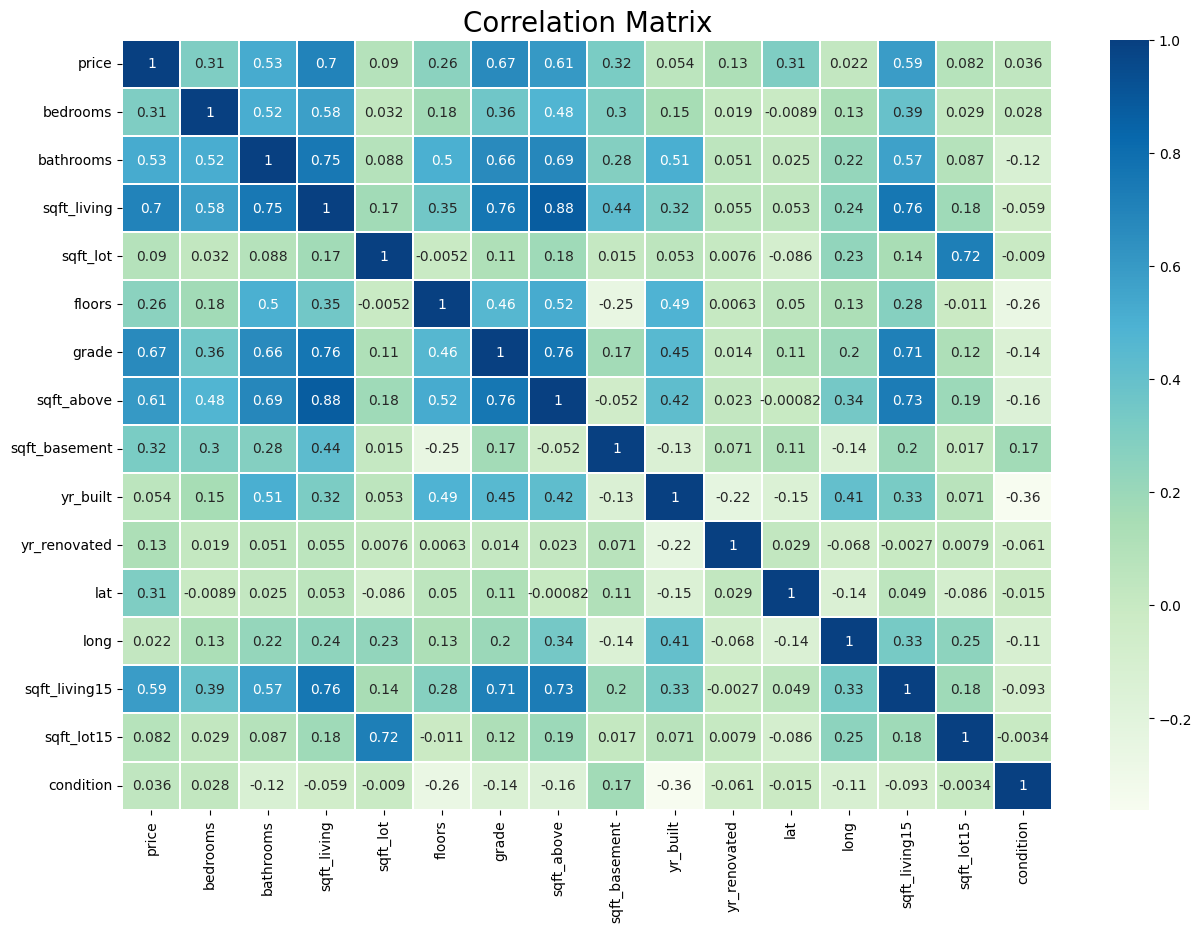

In [6]:
# Investigating the correlation strength between features

fig, ax = plt.subplots(figsize=(15, 10)) 
sns.heatmap(dataset.corr(), annot=True, linewidths=0.25, cmap="GnBu")
plt.title("Correlation Matrix", fontsize=20)
plt.show()

In [7]:
# Which features are more correlated to the target(price)?

dataset.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.525134
sqft_basement    0.323837
bedrooms         0.308338
lat              0.306919
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
condition        0.036392
long             0.021571
Name: price, dtype: float64

*Deductions:*

- The features: sqft_living, grade, sqft_above, sqft_living15 and bathrooms are highly correlated to the price 
and may influence prediction values more than other features.
- There seems to be high collinearity between several of the features. For eg highest correlation is 0.88 between sqft_above and sqft_living suggesting that the data is highly non-linear, and may be perfect for the random forest regressor.

## Initial model build

In [8]:
# Spliting dataset into features and target

X = dataset.iloc[:, 1:]  # Features
y = dataset.iloc[:, 0]   # Target

# Spliting into train and test set using 80/20 split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Root Mean Squared Error: 150385.451
Mean Squared Error: 22615783951.375
Mean Absolute Error: 78350.992
R² Score: 0.8454


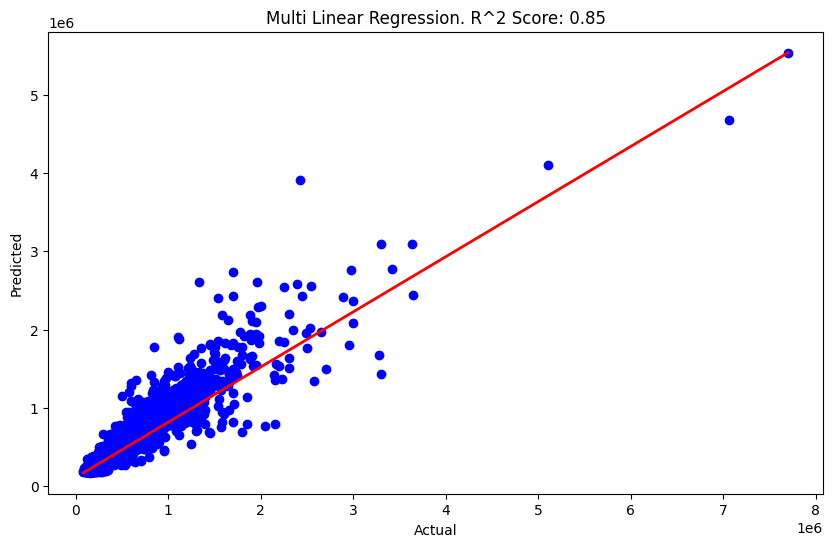

In [9]:
# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=50,  # Number of trees
    max_depth=10,   
    random_state=10    # Random state for reproducibility
)

# training the model
rf_model.fit(X_train, y_train)

# Evaluating the model

y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='red', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Random Forest Regression. R^2 Score: {r2:.2f}")
plt.show()

### Initial model results

- Prediction Errors:
    On average, the model’s predictions are off by $129,069 (MAE), which might be high depending on the price range.
    Large errors (possibly due to outliers or high variance) are reflected in the high MSE (45 billion dollars²).

- Model Fit:
    The model explains about 66.4% of the variance in house prices (R² Score), which is ok but can be improved as unexplained variance is about (~34.6%).

## Hyper parameter tuning

In [14]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=10),
    param_grid=param_grid,
    scoring='r2',
    cv=5, 
    n_jobs=-1, # using all processors to speed up search for this step, might result in high cpu usage
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best Parameters: {grid_search.best_params_}")

# Final model with best hyperparameters
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


## Deductions
- All of these features although shows a normal distribution, seemed to be positively skewed with a long right tail.
- Therefore we'll proceed to apply some log transformations to these to reduce the effect these extremes may have on the model. 

In [15]:
# Checking how well the model will generalize on new dataset using cross validation?

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, scoring='r2', cv=10)

# Print cross-validation results
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {cv_scores.mean()}")

Cross-Validation R² Scores: [0.82662998 0.83546008 0.85957718 0.84511512 0.84717602 0.82731902
 0.82374965 0.85755258 0.84582163 0.81980187]
Mean R² Score: 0.838820311032659


Root Mean Squared Error: 155251.335
Mean Squared Error: 24102976921.823
Mean Absolute Error: 75457.739
R² Score: 0.8352


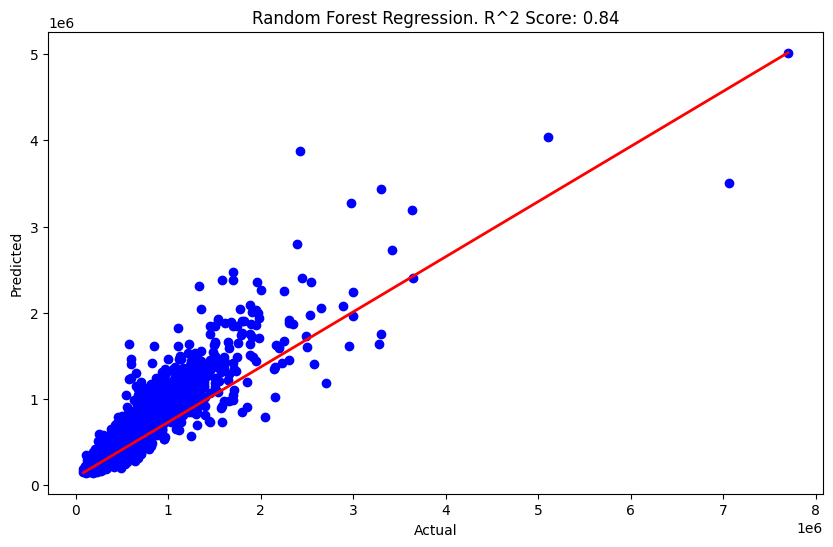

In [24]:
rf_model = RandomForestRegressor(
    n_estimators=150,
    max_depth=None,  
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=10
)

# training the model
rf_model.fit(X_train, y_train)

# Evaluating the model

y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='red', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Random Forest Regression. R^2 Score: {r2:.2f}")
plt.show()

## Varying the random states for the test_train split for accuracy comparison

In [18]:
random_states = range(0,11) 
rmse_scores = []
mae_scores = []
mse_scores = []
r2_scores = []

for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    rf_model = RandomForestRegressor(
    n_estimators=150,
    max_depth=None,  
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=10
)

    # training the model
    rf_model.fit(X_train, y_train)

    # Evaluating the model
    y_pred = rf_model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(root_mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))


results = pd.DataFrame({
    "random_states": random_states,
    "mae_score": mae_scores,
    "mse_score": mse_scores,
    "rmse_score": rmse_scores,
    "r2_score": r2_scores,
})

results

,random_states,mae_score,mse_score,rmse_score,r2_score
0,0,72307.381409,1.684172e+10,129775.665234,0.858574
1,1,81009.892271,3.178605e+10,178286.436708,0.816050
2,2,78126.741398,2.203820e+10,148452.692926,0.842332
3,3,75918.133123,1.836907e+10,135532.539048,0.857061
4,4,77289.683508,2.117663e+10,145521.932465,0.836478
5,5,79433.460913,2.234465e+10,149481.266507,0.836457
6,6,76566.991144,1.996949e+10,141313.437818,0.851151
7,7,77434.357592,2.211063e+10,148696.425622,0.832946
8,8,75885.833415,2.308879e+10,151949.948877,0.838256
9,9,77246.867321,2.061321e+10,143572.997164,0.852958


In [25]:
print("Average scores: ")
print(f"Average mean_squared_error: {np.mean(mse_scores):.4f}")
print(f"Average mean_absolute_error: {np.mean(mae_scores):.4f}")
print(f"Average root_mean_squared_error: {np.mean(rmse_scores):.4f}")
print(f"Average r2_score: {np.mean(r2_scores)}")

Average scores: 
Average mean_squared_error: 22034675015.6128
Average mean_absolute_error: 76995.2350
Average root_mean_squared_error: 147967.3962
Average r2_score: 0.8416261747649533


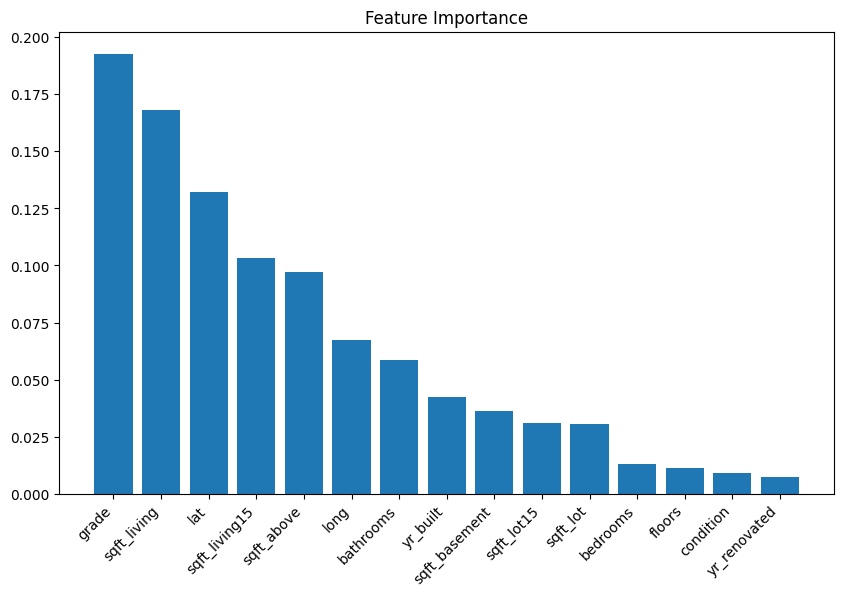

In [21]:
# Which features do influence the model prediction more?

# Feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.title("Feature Importance")
plt.show()